## SEIS 764-01 Assignment 5
**Jamie Boehme**

Import libraries for processing.

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

Read in data from Github repo

In [2]:
url = 'https://raw.githubusercontent.com/jamieboehme/Artificial-Intelligence/main/CellDNA.csv'
df = pd.read_csv(url, header=None)

Do some quick exploration of the dataset

In [3]:
df.columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','Target']
df.shape

(1217, 14)

Transform target variable into those that are interesting (have values greater than 0) and those that are not interesting.

In [4]:
new_target = df.loc[:,'Target']
new_target = pd.DataFrame(new_target)
new_target.loc[new_target.Target > 0, 'Target'] = 1

In [5]:
new_target

,Target
0,0
1,0
2,0
3,0
4,1
...,...
1212,0
1213,1
1214,0
1215,0


In [6]:
y = new_target.values.ravel()

In [7]:
x = df.iloc[:,0:13]

Standardize training variables

In [8]:
ZX= preprocessing.scale(x)
x = pd.DataFrame(ZX)
print(x, '\n')
print(x.mean(axis=0), 
x.std(axis=0))

            0         1         2         3         4         5         6   \
0     0.159528 -1.802006 -1.208134  0.114420 -0.135689  0.538311 -1.587426   
1    -0.939212 -1.809877  0.424363 -0.933511 -0.817247  0.019258  1.500586   
2     0.410247 -1.673790  0.555385  0.200447  0.134019  0.501621  1.684134   
3    -0.548385 -1.617137  1.879947 -1.059096  0.939523 -6.206504  1.253012   
4     0.181650 -1.525316  2.335905  0.578476 -0.417798  0.681969 -1.048779   
...        ...       ...       ...       ...       ...       ...       ...   
1212  0.115283  1.480684  0.036132  0.252878  0.049329  0.537678  0.250896   
1213  0.941181  1.528803 -1.156399  1.554010 -0.075675  0.729753  1.142193   
1214 -0.762234  1.588181 -0.028590 -0.555628 -0.315562  0.213238 -0.491114   
1215  0.166902  1.629782  0.170750  1.050082 -0.201979  0.705453  1.445251   
1216 -0.835975  1.603325  0.383793 -1.040983 -0.235315 -1.213681  0.364560   

            7         8         9         10        11        1

In [9]:
y_cat = utils.to_categorical(y,2)

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x, y_cat, test_size=0.3, random_state=1234)

In [11]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(851, 13) (851, 2) (366, 13) (366, 2)


1. Train a neural network using train and test records to perform a 
two-class classification.

In [12]:
model_1 = Sequential()
model_1.add(Dense(units = 11, input_dim=13, activation = 'relu', name = 'h1'))
model_1.add(Dense(units = 9, input_dim=13, activation = 'relu', name = 'h2'))
model_1.add(Dense(units = 7, activation = 'relu', name = 'h3'))
model_1.add(Dense(units = 5, activation = 'relu', name = 'h4'))
model_1.add(Dense(units = 2, activation = 'softmax')) 

In [13]:
sgd = SGD(lr = 0.1, momentum= 0.9, decay = 0.1)
model_1.compile(loss='binary_crossentropy', optimizer = sgd, metrics=['accuracy']) 
model_1.fit(x, y_cat, epochs=100, validation_data=(x_test,y_test), batch_size=4, verbose=1) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
305/305 [==============================] - 3s 5ms/step - loss: 0.2576 - accuracy: 0.8694 - val_loss: 0.2082 - val_accuracy: 0.9126
Epoch 2/100
305/305 [==============================] - 1s 4ms/step - loss: 0.2050 - accuracy: 0.9195 - val_loss: 0.1856 - val_accuracy: 0.9235
Epoch 3/100
305/305 [==============================] - 1s 4ms/step - loss: 0.1959 - accuracy: 0.9252 - val_loss: 0.1800 - val_accuracy: 0.9235
Epoch 4/100
305/305 [==============================] - 1s 4ms/step - loss: 0.1908 - accuracy: 0.9211 - val_loss: 0.1812 - val_accuracy: 0.9180
Epoch 5/100
305/305 [==============================] - 1s 4ms/step - loss: 0.1879 - accuracy: 0.9219 - val_loss: 0.1756 - val_accuracy: 0.9262
Epoch 6/100
305/305 [==============================] - 1s 4ms/step - loss: 0.1853 - accuracy: 0.9285 - val_loss: 0.1762 - val_accuracy: 0.9208
Epoch 7/100
305/305 [==============================] - 1s 4ms/step - loss: 0.1836 - accuracy: 0.9269 - val_loss: 0.1737 - val_accuracy: 0.9208

1. Print the configurations (architecture) of all the layers in your neural network

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 11)                154       
                                                                 
 h2 (Dense)                  (None, 9)                 108       
                                                                 
 h3 (Dense)                  (None, 7)                 70        
                                                                 
 h4 (Dense)                  (None, 5)                 40        
                                                                 
 dense (Dense)               (None, 2)                 12        
                                                                 
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________


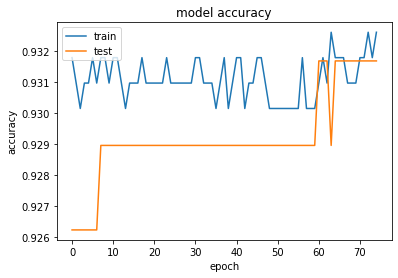

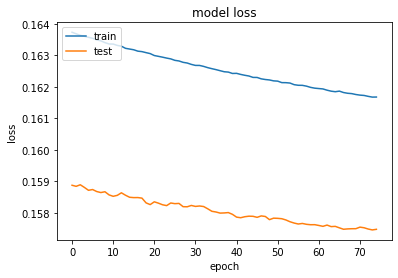

In [15]:
history = model_1.fit(x, y_cat, epochs=75, validation_data=(x_test,y_test), batch_size=4, verbose=0) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.show()

2a. Print the confusion matrix of your classification result, and what is the accuracy of classification result. This is based on **test** data.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred_prob = model_1.predict(x_test)
y_pred_class = np.argmax(y_pred_prob, axis = 1) 
y_test2 = np.argmax(y_test, axis=1)
print('Confusion Matrix \n', confusion_matrix(y_test2, y_pred_class))

Confusion Matrix 
 [[298  19]
 [  6  43]]


2b. Obtain overall accuracy score. This is based on **test** data

In [18]:
accuracy_score = model_1.evaluate(x, y_cat)

39/39 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9318


3a. Print the precision, recall, F-score for EACH class. This is based on **test** data.

In [19]:
print('Classification Report \n',classification_report(y_test2,y_pred_class))

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       317
           1       0.69      0.88      0.77        49

    accuracy                           0.93       366
   macro avg       0.84      0.91      0.87       366
weighted avg       0.94      0.93      0.93       366



Print history plot

3b. Also, create a ROC curve for EACH class.

0.9614369407068821
0.9614369407068821


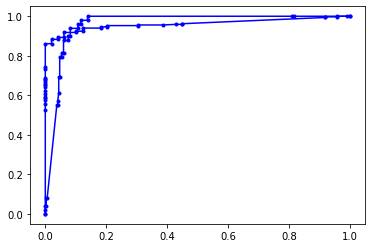

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

y_score = y_pred_prob

n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for cur_class in range(n_classes):
    fpr[cur_class], tpr[cur_class], _ = roc_curve(y_test[:, cur_class], y_score[:, cur_class ])  #, pos_label= 1)
    roc_auc[cur_class] = auc(fpr[cur_class], tpr[cur_class])
    print(roc_auc[cur_class])
    plt.plot(fpr[cur_class],tpr[cur_class], marker='.', label='Class_0', color='b')

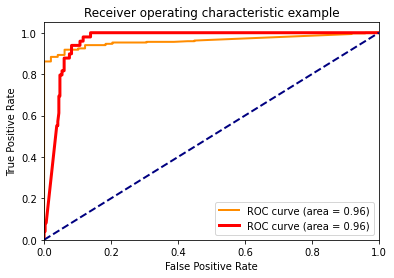

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='red',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Review Z-code (for fun)

In [22]:
model_2 = Model(inputs=model_1.input,
                outputs = model_1.get_layer('h4').output)
Z_code = model_2.predict(x)

In [23]:
tsne = TSNE(n_components=2, random_state=0)  
tsne_z = tsne.fit_transform(Z_code)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
tsne_x = tsne.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne x')]

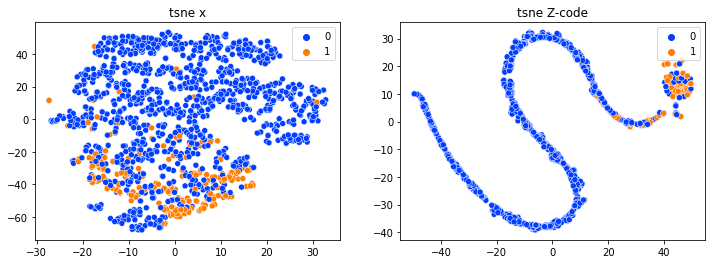

In [25]:
x1,y1=tsne_z[:,0],tsne_z[:,1] 
x2,y2=tsne_x[:,0],tsne_x[:,1]
f, axes = plt.subplots(1, 2, figsize=(12,4))
palette = sns.color_palette("bright", 2) 
sns.scatterplot(x1, y1, palette=palette, hue = y, legend='full',ax=axes[1]).set(title = 'tsne Z-code') 
sns.scatterplot(x2, y2, palette=palette, hue = y, legend='full',ax=axes[0]).set(title = 'tsne x')